### Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

### Data Preparation

In [ ]:
df = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [ ]:
df.sample(10)

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
215,Lampung,2012,3101455.0,641876.0,1685.0,79.20,26.80
62,Sumatera Barat,1999,1897678.0,432254.0,4327.5,80.89,22.48
213,Lampung,2010,2807676.0,590608.0,2710.0,82.30,26.70
45,Sumatera Utara,2010,3582302.0,754674.0,1903.3,78.55,27.18
67,Sumatera Barat,2004,1875188.0,422582.0,4584.2,78.50,29.02
32,Sumatera Utara,1997,3212208.0,797545.0,1865.0,81.81,26.40
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
104,Riau,2013,434144.0,118518.0,2628.0,76.00,26.00
101,Riau,2010,574864.0,156088.0,3390.0,76.20,27.70
23,Aceh,2016,2180754.0,293067.0,1096.0,83.32,27.12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
df.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

### tidak ada missing value

In [ ]:
df['Provinsi'].unique()

array(['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi',
       'Sumatera Selatan', 'Bengkulu', 'Lampung'], dtype=object)

# Exploratory Data Analysis

### Provinsi mana yang memiliki angka produksi paling banyak?

In [ ]:
produksi_provinsi = df.groupby('Provinsi')['Produksi'].sum()
produksi_provinsi = produksi_provinsi.reset_index()
#result = result.nlargest(10, 'Produksi')
print(produksi_provinsi)

           Provinsi     Produksi
0              Aceh  45324629.64
1          Bengkulu  12459015.75
2             Jambi  15480186.69
3           Lampung  68433897.53
4              Riau  11409006.55
5    Sumatera Barat  55731075.23
6  Sumatera Selatan  74161992.54
7    Sumatera Utara  93253194.72


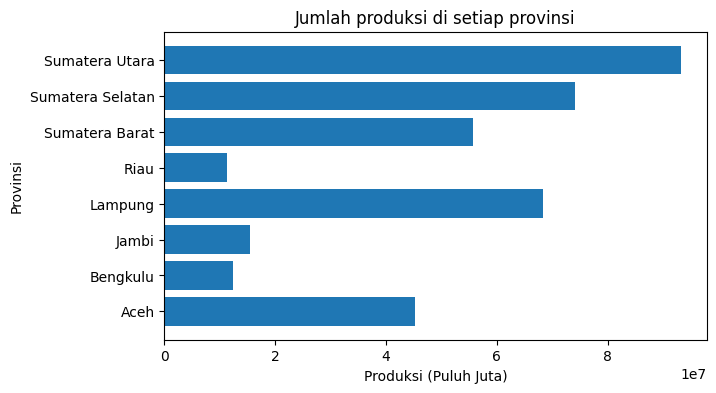

In [ ]:
plt.figure(figsize=(7, 4))
plt.barh(produksi_provinsi['Provinsi'], produksi_provinsi['Produksi'])
plt.xlabel('Produksi (Puluh Juta)')
plt.ylabel('Provinsi')
plt.title('Jumlah produksi di setiap provinsi')
plt.show()

### Saya ingin mengetahui gambaran dari kubungan antar variabel dengan cara visualisasi heatmap

In [ ]:
# Melakukan label encoding pada kolom 'kategori'
df2 = df.copy()
label_encoder = LabelEncoder()
df2['Provinsi'] = label_encoder.fit_transform(df2['Provinsi'])
df2.head(10)

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,0,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,0,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,0,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,0,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,0,1997,1368074.0,337561.0,1339.0,82.46,26.31
5,0,1998,1404580.0,365892.0,1465.0,82.60,26.84
6,0,1999,1478712.0,359817.0,1778.0,82.79,26.14
7,0,2000,1486909.0,336765.0,1974.7,90.60,27.10
8,0,2001,1547499.0,295212.0,1688.7,69.48,28.90
9,0,2002,1314165.0,315131.0,1296.8,68.75,29.20


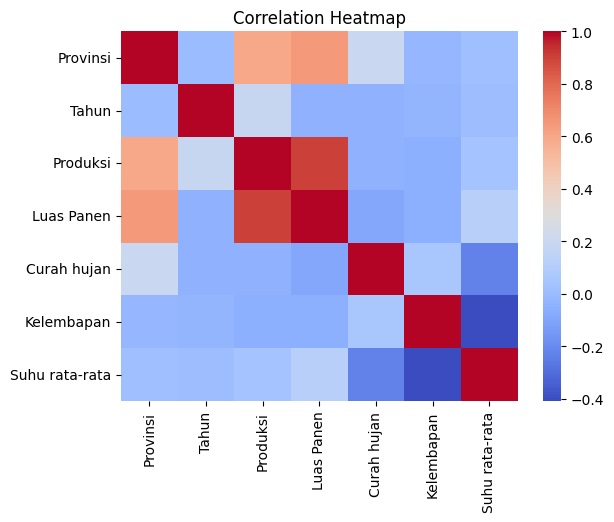

In [ ]:
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Bagaimana trend hasil produksi dari tahun ke tahun? Apakah ada kenaikan atau penurunan yang signifikan di tahun tertentu? Jika iya, mengapa hal tersebut bisa terjadi?

In [ ]:
produksi_tahun = df.groupby('Tahun')['Produksi'].sum()
produksi_tahun = produksi_tahun.reset_index()
#result = result.nlargest(10, 'Produksi')
print(produksi_tahun)

    Tahun     Produksi
0    1993  10511106.00
1    1994  10434879.00
2    1995  11277878.00
3    1996  11681931.00
4    1997  11069582.00
5    1998  11736390.00
6    1999  11816051.00
7    2000  11901379.00
8    2001  11571056.00
9    2002  11531731.00
10   2003  11823024.00
11   2004  12445839.00
12   2005  12655694.00
13   2006  12001280.00
14   2007  12841479.00
15   2008  13581940.00
16   2009  14652674.00
17   2010  15382976.00
18   2011  15670413.00
19   2012  15782225.00
20   2013  17093915.00
21   2014  16604009.00
22   2015  17956252.00
23   2016  19365875.90
24   2017  20586773.50
25   2018  11764423.68
26   2019  10881099.49
27   2020  11631123.08


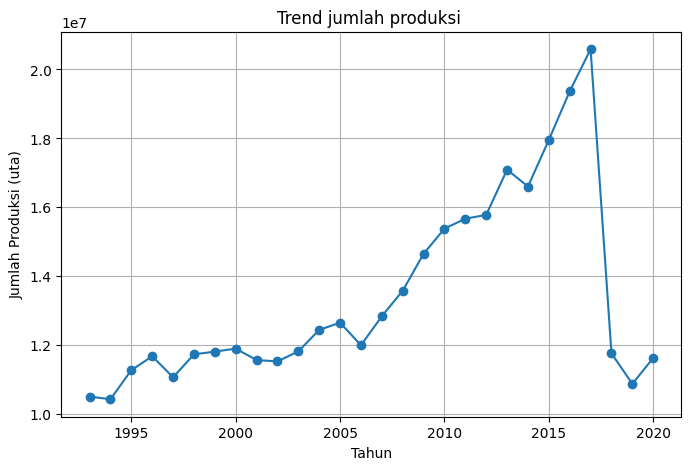

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(produksi_tahun['Tahun'], produksi_tahun['Produksi'], marker='o', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Produksi (uta)')
plt.title('Trend jumlah produksi ')
#plt.xticks(total_penumpang_per_month.index)
plt.grid(True)
plt.show()

### Apakah ada hubungannya dengan faktor kelembapan udara? (khususnya di tahun penurunan)

In [ ]:
kelembapan_tahun = df.groupby('Tahun')['Kelembapan'].mean()
kelembapan_tahun = kelembapan_tahun.reset_index()
#result = result.nlargest(10, 'Produksi')
print(kelembapan_tahun)

    Tahun  Kelembapan
0    1993    84.85625
1    1994    81.25000
2    1995    84.00875
3    1996    83.81000
4    1997    82.20375
5    1998    84.15500
6    1999    83.15875
7    2000    84.98125
8    2001    72.07125
9    2002    71.12750
10   2003    70.93125
11   2004    81.66000
12   2005    82.10375
13   2006    80.41250
14   2007    82.96250
15   2008    82.25000
16   2009    82.05000
17   2010    82.43750
18   2011    76.84000
19   2012    80.53750
20   2013    81.82875
21   2014    81.01875
22   2015    81.88750
23   2016    81.79625
24   2017    81.93125
25   2018    79.70500
26   2019    83.72375
27   2020    80.86500


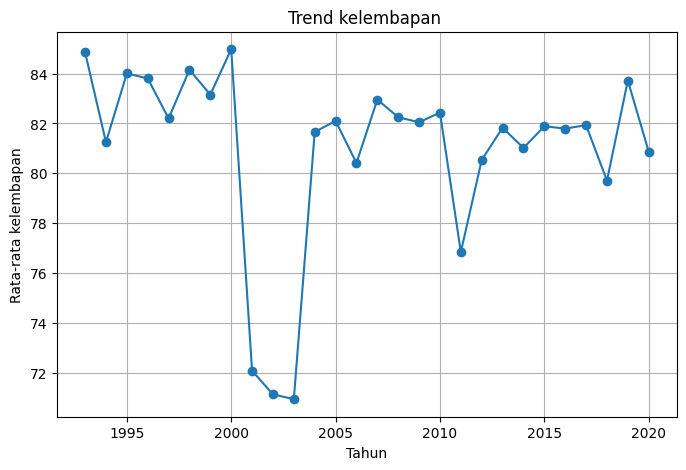

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(kelembapan_tahun['Tahun'], kelembapan_tahun['Kelembapan'], marker='o', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata kelembapan')
plt.title('Trend kelembapan ')
#plt.xticks(total_penumpang_per_month.index)
plt.grid(True)
plt.show()

### Bagaimana dengan rata-rata suhunya? apakah suhu cukup berpengaruh terhadap jumlah produksi?

In [ ]:
suhu_tahun = df.groupby('Tahun')['Suhu rata-rata'].mean()
suhu_tahun = suhu_tahun.reset_index()
#result = result.nlargest(10, 'Produksi')
print(suhu_tahun)

    Tahun  Suhu rata-rata
0    1993        26.03000
1    1994        25.92000
2    1995        26.14375
3    1996        25.89250
4    1997        26.17875
5    1998        26.51125
6    1999        25.65125
7    2000        26.51750
8    2001        28.07625
9    2002        28.38625
10   2003        29.50000
11   2004        29.31875
12   2005        26.55875
13   2006        26.80375
14   2007        26.72250
15   2008        26.60000
16   2009        26.86250
17   2010        26.93250
18   2011        26.83125
19   2012        26.81250
20   2013        26.80000
21   2014        26.72500
22   2015        27.12500
23   2016        26.55000
24   2017        26.14375
25   2018        26.32000
26   2019        26.81625
27   2020        25.72500


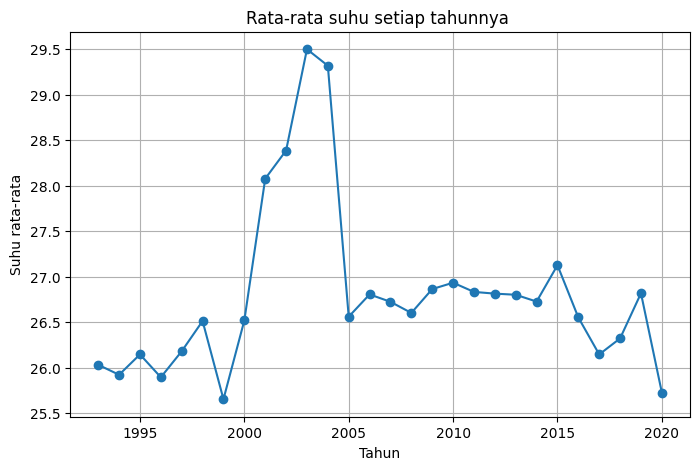

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(suhu_tahun['Tahun'], suhu_tahun['Suhu rata-rata'], marker='o', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('Suhu rata-rata')
plt.title('Rata-rata suhu setiap tahunnya ')
#plt.xticks(total_penumpang_per_month.index)
plt.grid(True)
plt.show()

### Bagaimana dengan curah hujannya? apakah curah hujan juga mempengaruhi hasil produksi?

In [ ]:
curah_hujan_tahun = df.groupby('Tahun')['Curah hujan'].mean()
curah_hujan_tahun = curah_hujan_tahun.reset_index()
#result = result.nlargest(10, 'Produksi')
print(curah_hujan_tahun)

    Tahun  Curah hujan
0    1993   2906.31250
1    1994   2281.18750
2    1995   3140.31250
3    1996   2599.75000
4    1997   1583.52500
5    1998   2917.36250
6    1999   2727.60000
7    2000   2124.78750
8    2001   2614.06250
9    2002   2529.86250
10   2003   2911.46250
11   2004   2586.46250
12   2005   1547.21250
13   2006    847.92500
14   2007   2665.30000
15   2008   2442.86250
16   2009   2771.12500
17   2010   3205.28750
18   2011   2449.52500
19   2012   2554.37500
20   2013   2930.76250
21   2014   2256.07500
22   2015   2010.78750
23   2016   2554.85000
24   2017   2886.17500
25   2018   1936.70375
26   2019   2077.53750
27   2020   2610.55000


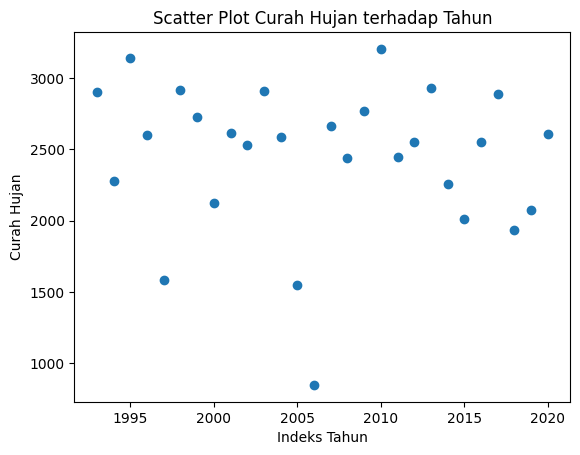

In [ ]:
plt.scatter(curah_hujan_tahun['Tahun'] ,curah_hujan_tahun['Curah hujan'])  # Menggunakan df.index sebagai sumbu x, bisa disesuaikan dengan data yang dimiliki
plt.xlabel('Indeks Tahun')  # Atur label sumbu x sesuai dengan kebutuhan Anda
plt.ylabel('Curah Hujan')  # Label untuk sumbu y
plt.title('Scatter Plot Curah Hujan terhadap ')  # Judul plot

# Menampilkan plot
plt.show()

### Saya mencari tahu apakah ada hubungan korelasi antara curah hujan dan hasil produksi menggunakan regresi linear

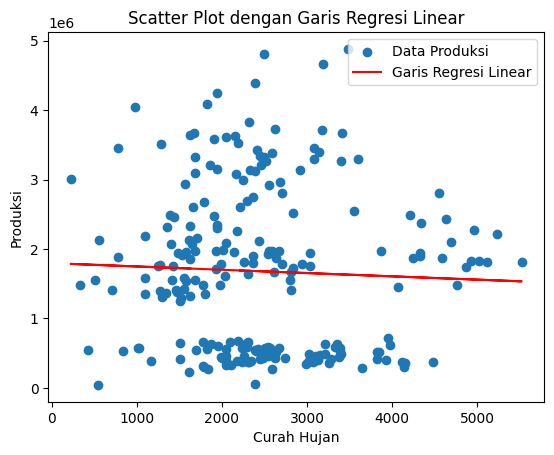

In [ ]:
# Membuat scatter plot
plt.scatter(df['Curah hujan'], df['Produksi'], label='Data Produksi')

# Melakukan regresi linear
model = LinearRegression()
model.fit(df[['Curah hujan']], df['Produksi'])
regression_line = model.predict(df[['Curah hujan']])

# Plot garis regresi linear
plt.plot(df['Curah hujan'], regression_line, color='red', label='Garis Regresi Linear')

# Label sumbu dan judul plot
plt.xlabel('Curah Hujan')
plt.ylabel('Produksi')
plt.title('Scatter Plot dengan Garis Regresi Linear')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

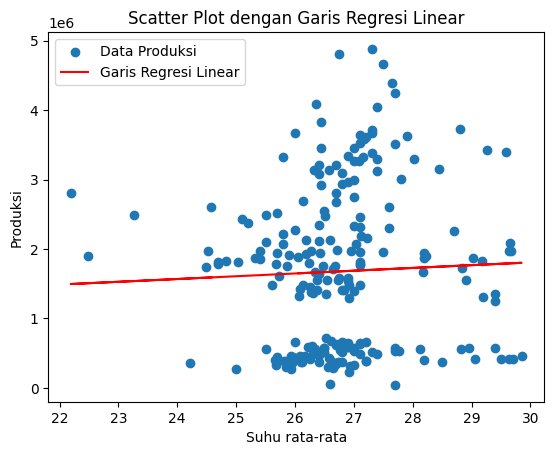

In [ ]:
# Membuat scatter plot
plt.scatter(df['Suhu rata-rata'], df['Produksi'], label='Data Produksi')

# Melakukan regresi linear
model = LinearRegression()
model.fit(df[['Suhu rata-rata']], df['Produksi'])
regression_line = model.predict(df[['Suhu rata-rata']])

# Plot garis regresi linear
plt.plot(df['Suhu rata-rata'], regression_line, color='red', label='Garis Regresi Linear')

# Label sumbu dan judul plot
plt.xlabel('Suhu rata-rata')
plt.ylabel('Produksi')
plt.title('Scatter Plot dengan Garis Regresi Linear')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

### Lalu apakah di tahun tertentu rata-rata suhunya terjadi kenaikan atau penurunan?

In [ ]:
# Mencari tahun dengan jumlah produksi tertinggi
tahun_produksi_tertinggi = df.loc[df['Produksi'].idxmax()]['Tahun']
jumlah_produksi_tertinggi = df['Produksi'].max()

print(f"Jumlah produksi tertinggi adalah {jumlah_produksi_tertinggi} pada tahun {tahun_produksi_tertinggi}.")

Jumlah produksi tertinggi adalah 4881089.0 pada tahun 2016.


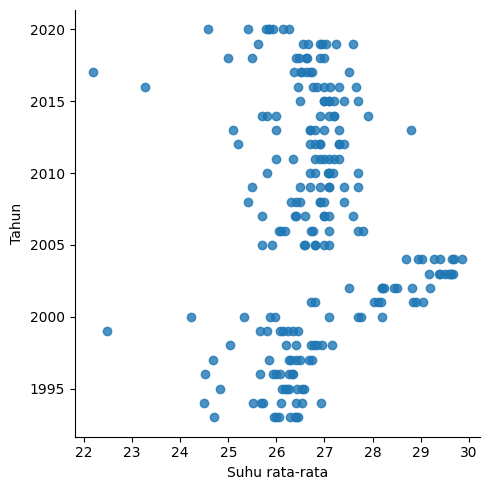

In [ ]:
sns.lmplot(x='Suhu rata-rata', y='Tahun', data=df, fit_reg=False)

### Ternyata setelah dilihat Luas Panen (Luas Tanah) terjadi penurunan secara derastis di tahun penurunan hasil produksi

In [ ]:
tanah_tahun = df.groupby('Tahun')['Luas Panen'].mean()
tanah_tahun = tanah_tahun.reset_index()
#result = result.nlargest(10, 'Produksi')
print(tanah_tahun)

    Tahun    Luas Panen
0    1993  350114.25000
1    1994  348414.62500
2    1995  375457.25000
3    1996  383503.12500
4    1997  362133.37500
5    1998  395257.37500
6    1999  385883.25000
7    2000  381923.25000
8    2001  361182.75000
9    2002  368250.37500
10   2003  381278.62500
11   2004  394142.75000
12   2005  389560.00000
13   2006  370308.50000
14   2007  396491.75000
15   2008  392903.87500
16   2009  415300.75000
17   2010  421394.00000
18   2011  427794.00000
19   2012  434844.62500
20   2013  438442.25000
21   2014  431985.37500
22   2015  461121.25000
23   2016  274593.62500
24   2017  275097.00000
25   2018  295975.06375
26   2019  279416.22875
27   2020  289029.78125


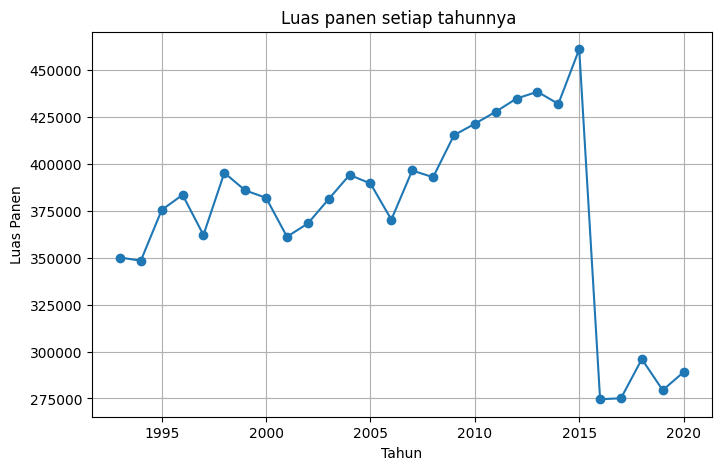

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(tanah_tahun['Tahun'], tanah_tahun['Luas Panen'], marker='o', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('Luas Panen')
plt.title('Luas panen setiap tahunnya ')
#plt.xticks(total_penumpang_per_month.index)
plt.grid(True)
plt.show()

### Dan memang luas tanah mempunyai hubungan korelasi positif yang cukup kuat

<ipython-input-44-d662e2406e0f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
<ipython-input-44-d662e2406e0f>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


                   Tahun  Produksi  Luas Panen  Curah hujan  Kelembapan  \
Tahun           1.000000  0.182527   -0.045951    -0.047645   -0.033474   
Produksi        0.182527  1.000000    0.905622    -0.042129   -0.052316   
Luas Panen     -0.045951  0.905622    1.000000    -0.092975   -0.061121   
Curah hujan    -0.047645 -0.042129   -0.092975     1.000000    0.056466   
Kelembapan     -0.033474 -0.052316   -0.061121     0.056466    1.000000   
Suhu rata-rata  0.004923  0.041160    0.115726    -0.228699   -0.407799   

                Suhu rata-rata  
Tahun                 0.004923  
Produksi              0.041160  
Luas Panen            0.115726  
Curah hujan          -0.228699  
Kelembapan           -0.407799  
Suhu rata-rata        1.000000  


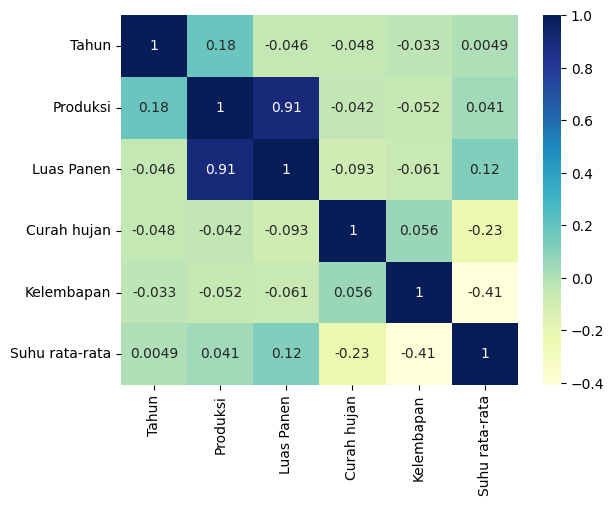

In [ ]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df2.corr())

# plotting correlation heatmap
dataplot = sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

# Keterangan


*   Terjadi penurunan hasil produksi secara signifikan di antara tahun 2017-2019
*   Di lain sisi, juga terjadi kenaikan secara signifikan mulai tahun 2006-2016
*   Kelembapan udara, suhu, dan curah hujan tidak terlalu berpengaruh kepada angka hasil produksi
*   Ternyata faktor yang paling berpengaruh terhadap hasil produksi adalah luas panen (luas tanah)



